In [1]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
#
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [2]:
nx = 81
dx = 0.25
#
x_left = -10
x_right = 10
#
x = numpy.linspace(x_left,x_right,nx)
#
dt = .0002 
T_terminal = .01 #seconds
#
nt = int(T_terminal/dt)
#
gamma = 1.4

In [3]:
print(nt)

50


In [4]:
#left side:
rho_init_left = 1. #kg/m3
vel_init_left = 0. #m/s
P_init_left = 100. #KN/m2
#right side:
rho_init_right = 0.125 #kg/m3
vel_init_right = 0. #m/s
P_init_right = 10. #KN/m2

In [5]:
def get_U_initial(nx):
    u = numpy.zeros((3,nx),dtype=float)
    for i in range(nx):
        if (x[i] < 0):
            u[0,i] = rho_init_left
            u[1,i] = vel_init_left*rho_init_left
            u[2,i] = P_init_left/(gamma-1.)
        else:
            u[0,i] = rho_init_right
            u[1,i] = vel_init_right*rho_init_right
            u[2,i] = P_init_right/(gamma-1.)
    #
    return u

In [6]:
def get_Flux(Uv):
    return  numpy.array( (Uv[1,:],\
                        (((Uv[1,:]**2)/Uv[0,:]) + (gamma-1)*(Uv[2,:] - 0.5*(Uv[1,:]**2)/Uv[0,:])),\
                        (Uv[2,:] + (gamma-1)*(Uv[2,:] - 0.5*(Uv[1,:]**2)/Uv[0,:]))*(Uv[1,:]/Uv[0,:])), dtype=float )

In [7]:
def Richtmyer(U_init, numt, delt, delx, numx):
    #
    Un = numpy.zeros((numt+1,3,numx))
    Un[:,:,:] = numpy.asarray(U_init)
    Ustar = numpy.asarray(U_init)
    U = numpy.asarray(U_init)
    #
    for t in range(1,numt+1):
        #predictor step
        Fstar = get_Flux(U) 
        Ustar[:,:-1] = 0.5*(U[:,1:] + U[:,:-1]) - (delt/(2*delx))*(Fstar[:,1:] - Fstar[:,:-1]) 
        #Corrector Step
        F = get_Flux(Ustar) 
        Un[t,:,1:-1] = U[:,1:-1] - (delt/delx)*(F[:,1:-1] - F[:,:-2])
        U = numpy.asarray(Un[t,:,:])
        #
    return Un[:,:,:]     

In [8]:
U_initial = get_U_initial(nx)

In [9]:
UN = Richtmyer(U_initial, nt, dt, dx, nx)

In [10]:
def animate(UN):
    x = numpy.linspace(x_left,x_right,nx)
    y = UN[0,:]
    line.set_data(x,y)
    return line,


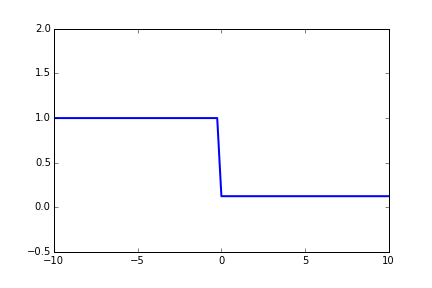
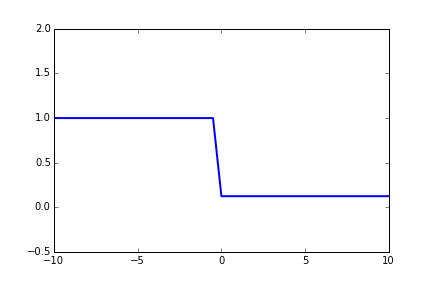
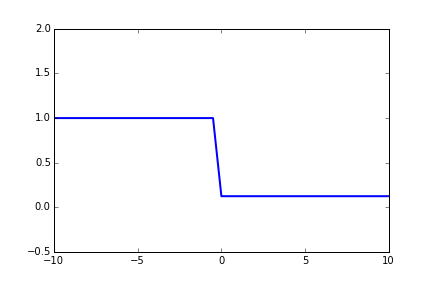
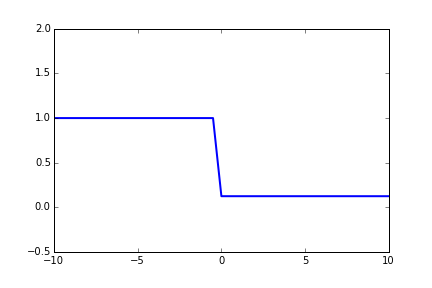
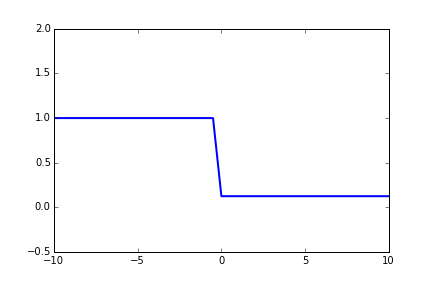
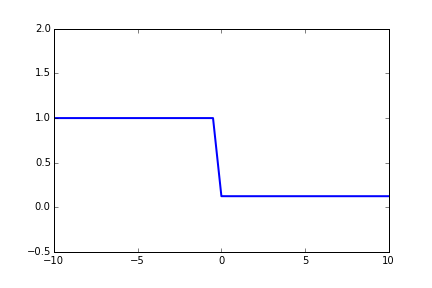
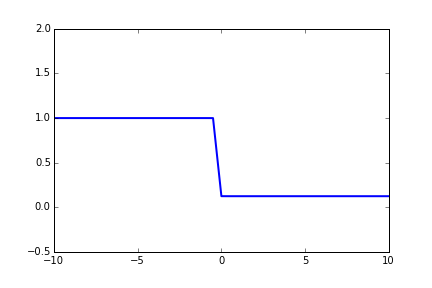
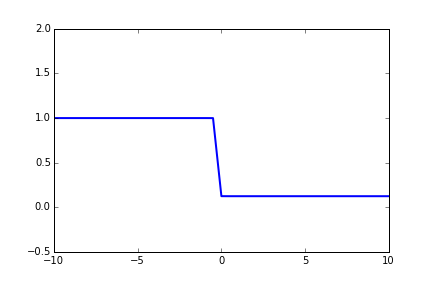
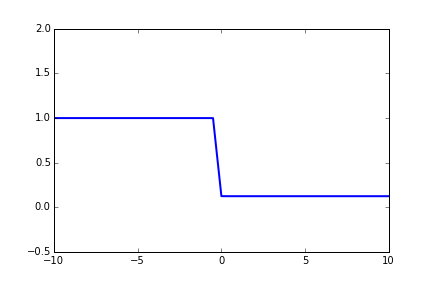
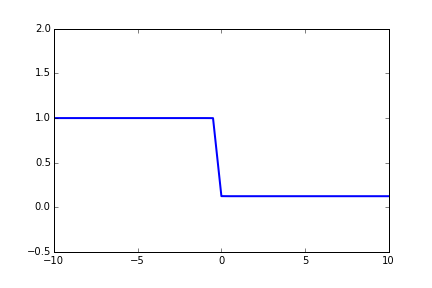
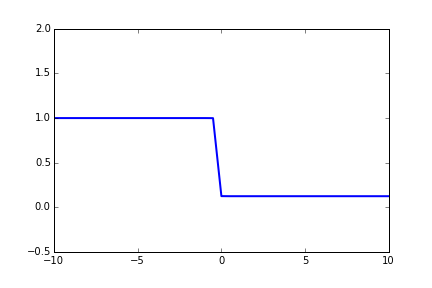
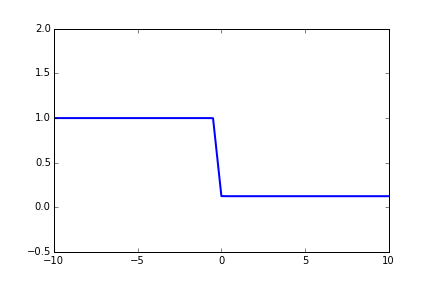
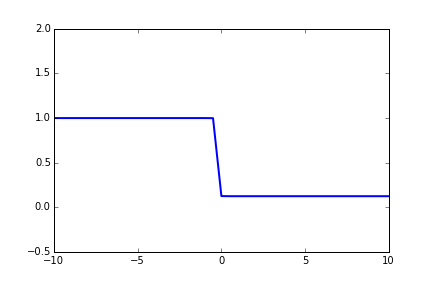
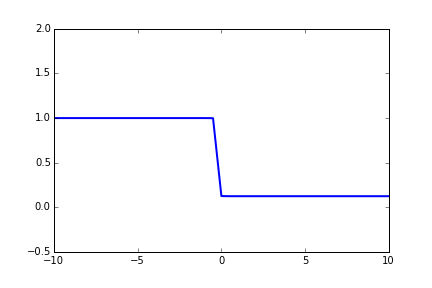
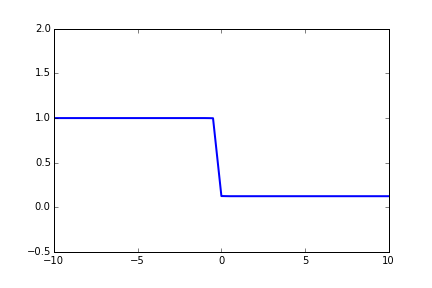
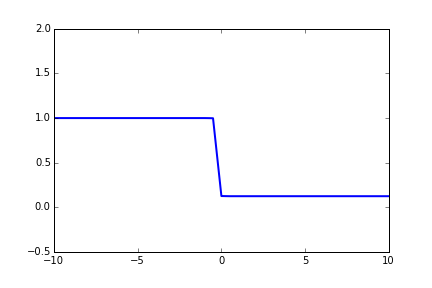
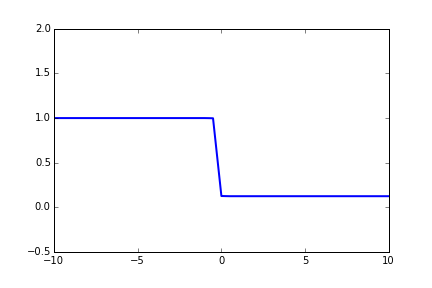
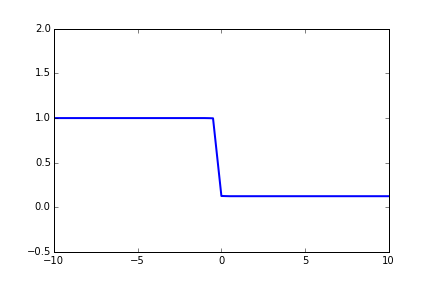
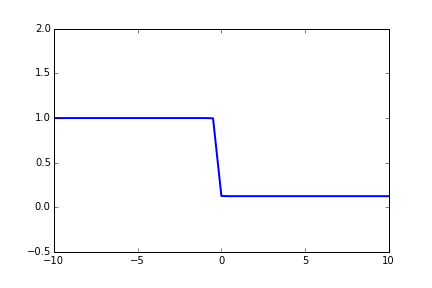
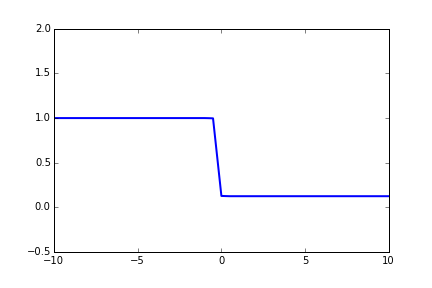
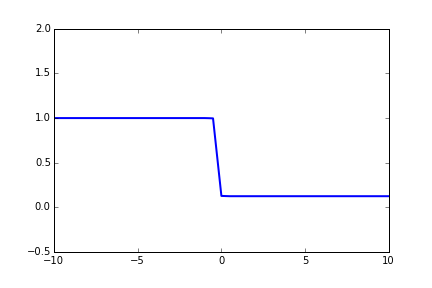
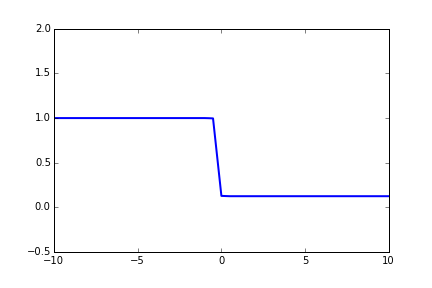
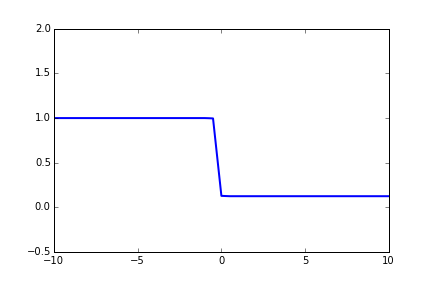
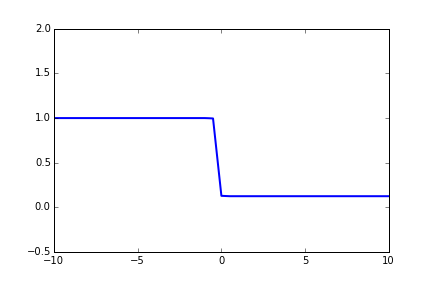
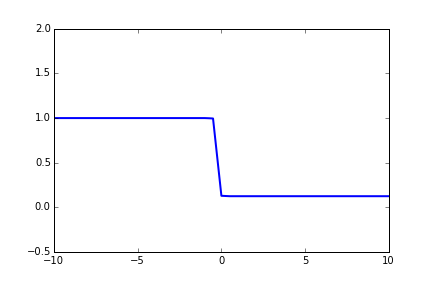
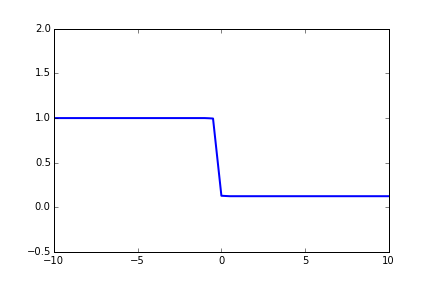
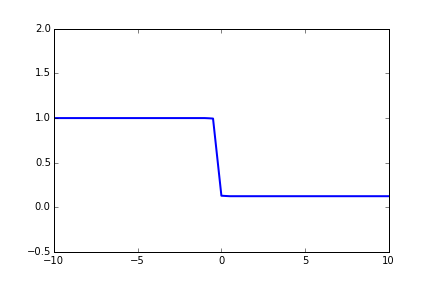
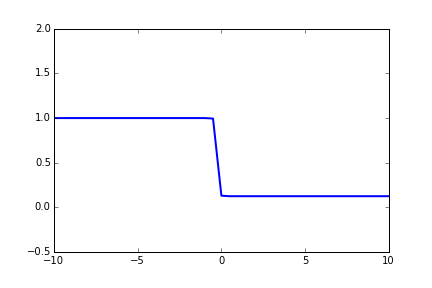
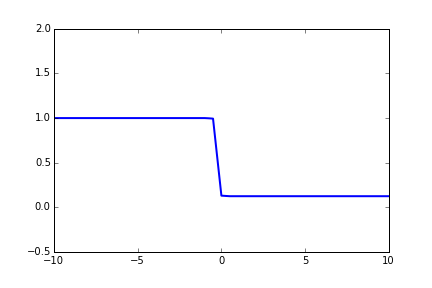
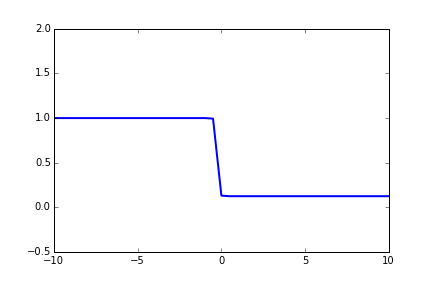
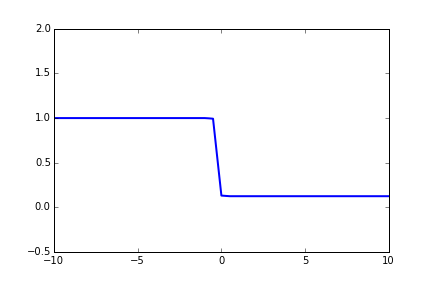
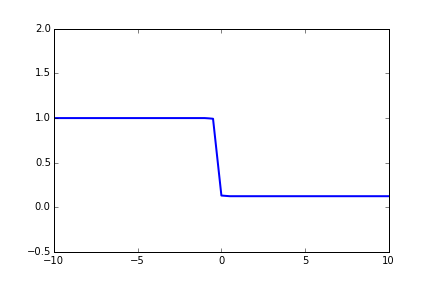
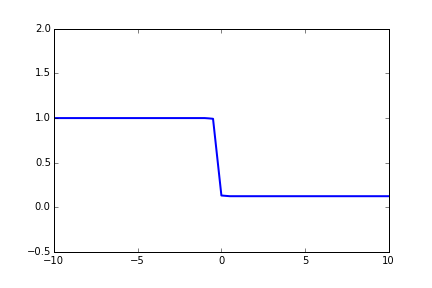
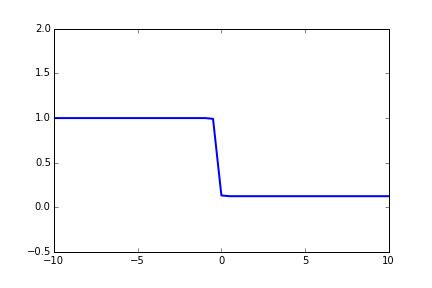
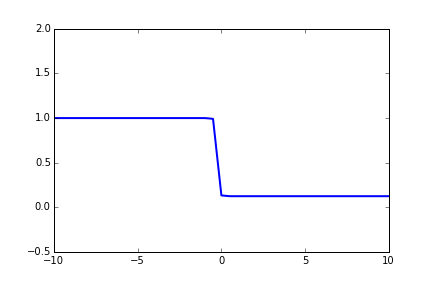
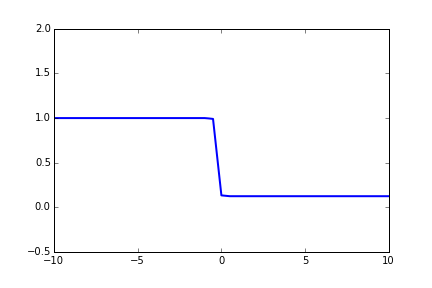
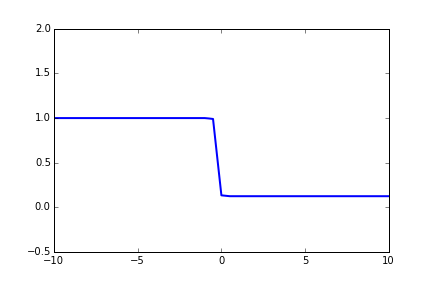
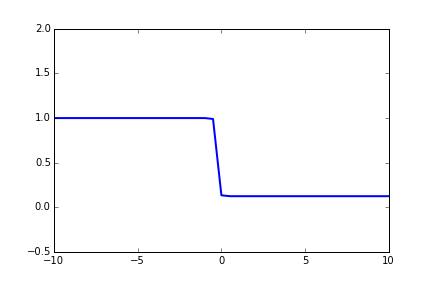
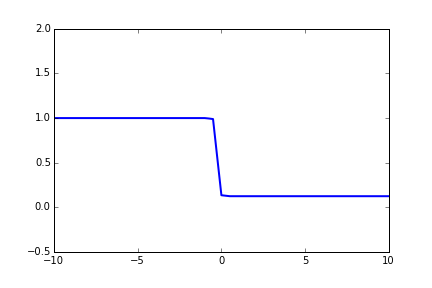
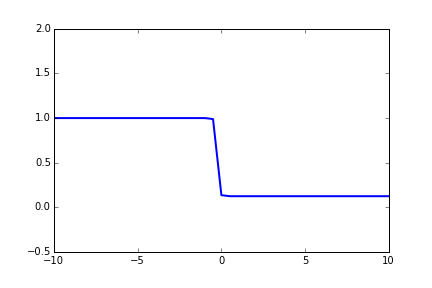
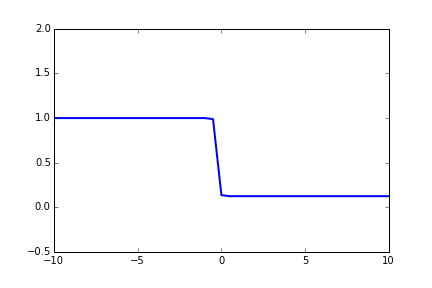
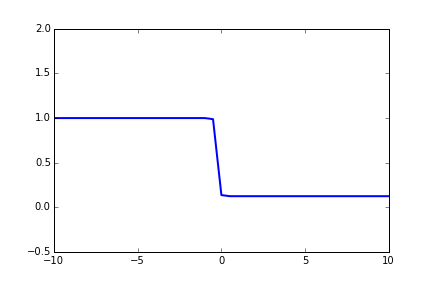
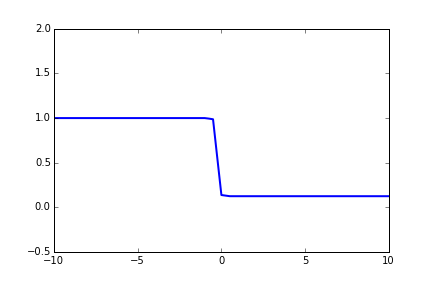
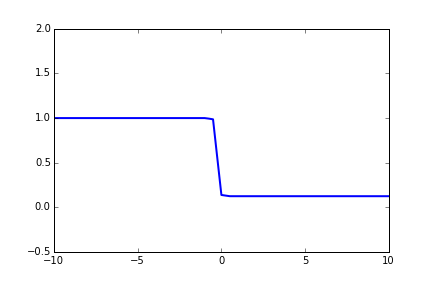
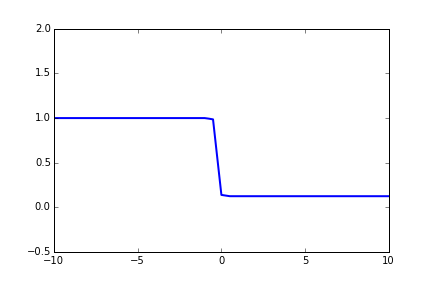
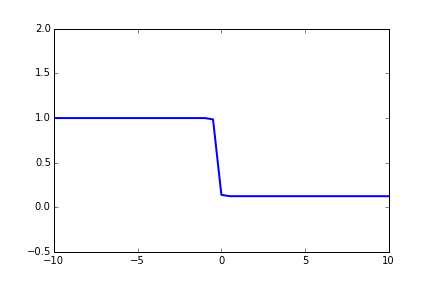
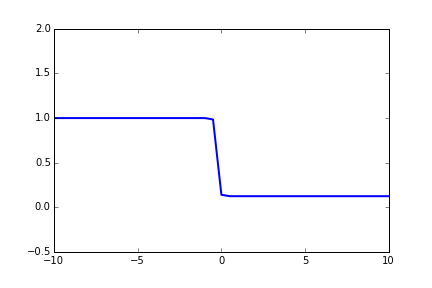
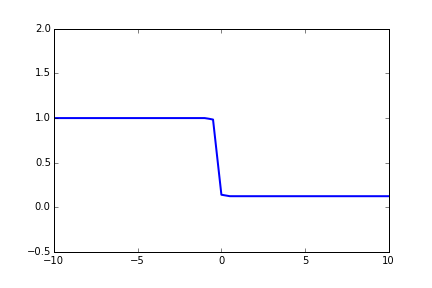
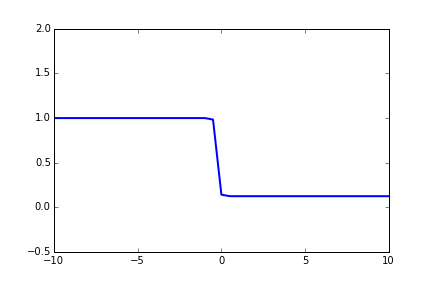
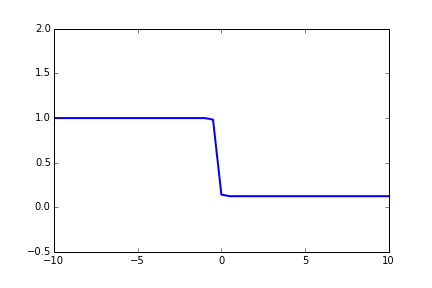
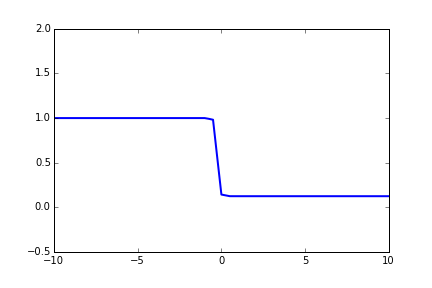

In [11]:
#density profile
fig = pyplot.figure();
ax = pyplot.axes(xlim=(-10,10),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=UN, interval=50)
display_animation(anim, default_mode='once')

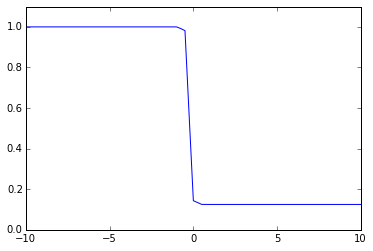

In [12]:
#density at las time step
pyplot.plot(x,UN[50,0,:])
pyplot.ylim(0,1.1);

### Assignment Questions

In [13]:
numpy.where(x==2.5)

(array([50]),)

In [14]:
velocity = UN[nt,1,50]/UN[nt,0,50]

In [15]:
print(numpy.round(velocity,2))

0.0


In [16]:
pressure = (gamma-1)*(UN[nt,2,50] - 0.5*(UN[nt,1,50]**2)/UN[nt,0,50])

In [17]:
print(numpy.round(pressure*1000,2))

10000.0


In [18]:
density = UN[nt,0,50]

In [19]:
print(numpy.round(density,2))

0.12
